## Project 3 : Fetal Health Classification¶

------------------------------------------------------------------------------------------------------------------------------

Cardiotocography (CTG) is used during pregnancy to monitor fetal heart rate and uterine contractions. It is monitor fetal well-being and allows early detection of fetal distress.

CTG interpretation helps in determining if the pregnancy is high or low risk. An abnormal CTG may indicate the need for further investigations and potential intervention.

In this project, I will create a model to classify the outcome of Cardiotocogram test to ensure the well being of the fetus.

TABLE OF CONTENTS

* MPORTING LIBRARIES

* LOADING DATA

* DATA PREPROCESSING

* DATA ANALYSIS

* SCALLING DATA

* SPLIT DATA 

* MODEL BUILDING

   * LOGISTIC REGRESSION MODEL 
   * RANDOM FOREST MODEL
   * KNN MODEL
   
* VISUALISING  TESR SET FOR EACH MODEL 
   
  
* EVALUATION EACH MODEL 

* CONCLUSIONS

*************************************************************************************************************************************
*************************************************************************************************************************************
*************************************************************************************************************************************


Data This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

* Normal
* Suspect
* Pathological

*************************************************************************************************************************************
*************************************************************************************************************************************
*************************************************************************************************************************************
*************************************************************************************************************************************

MPORTING LIBRARIES Part :

### Step1 : 

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
np.random.seed(0)
import seaborn as sb
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

*************************************************************************************************************************************
*************************************************************************************************************************************
*************************************************************************************************************************************


#### Load the DATA 

In [2]:
path = "C:\\Users\\abo fisel\\Desktop\\project\\NBM_Classification_Gamma\\"
data = pd.read_csv(path + 'fetal_health.csv')
data.head(3)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0


*************************************************************************************************************************************
*************************************************************************************************************************************
*************************************************************************************************************************************


#### Verifying Basic Data Integrity (.head , .shape ..etc.. )

In [3]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
data.shape

(2126, 22)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

*************************************************************************************************************************************
*************************************************************************************************************************************
*************************************************************************************************************************************


#### Visualizing to Show the data ... ( hist , correlations…)

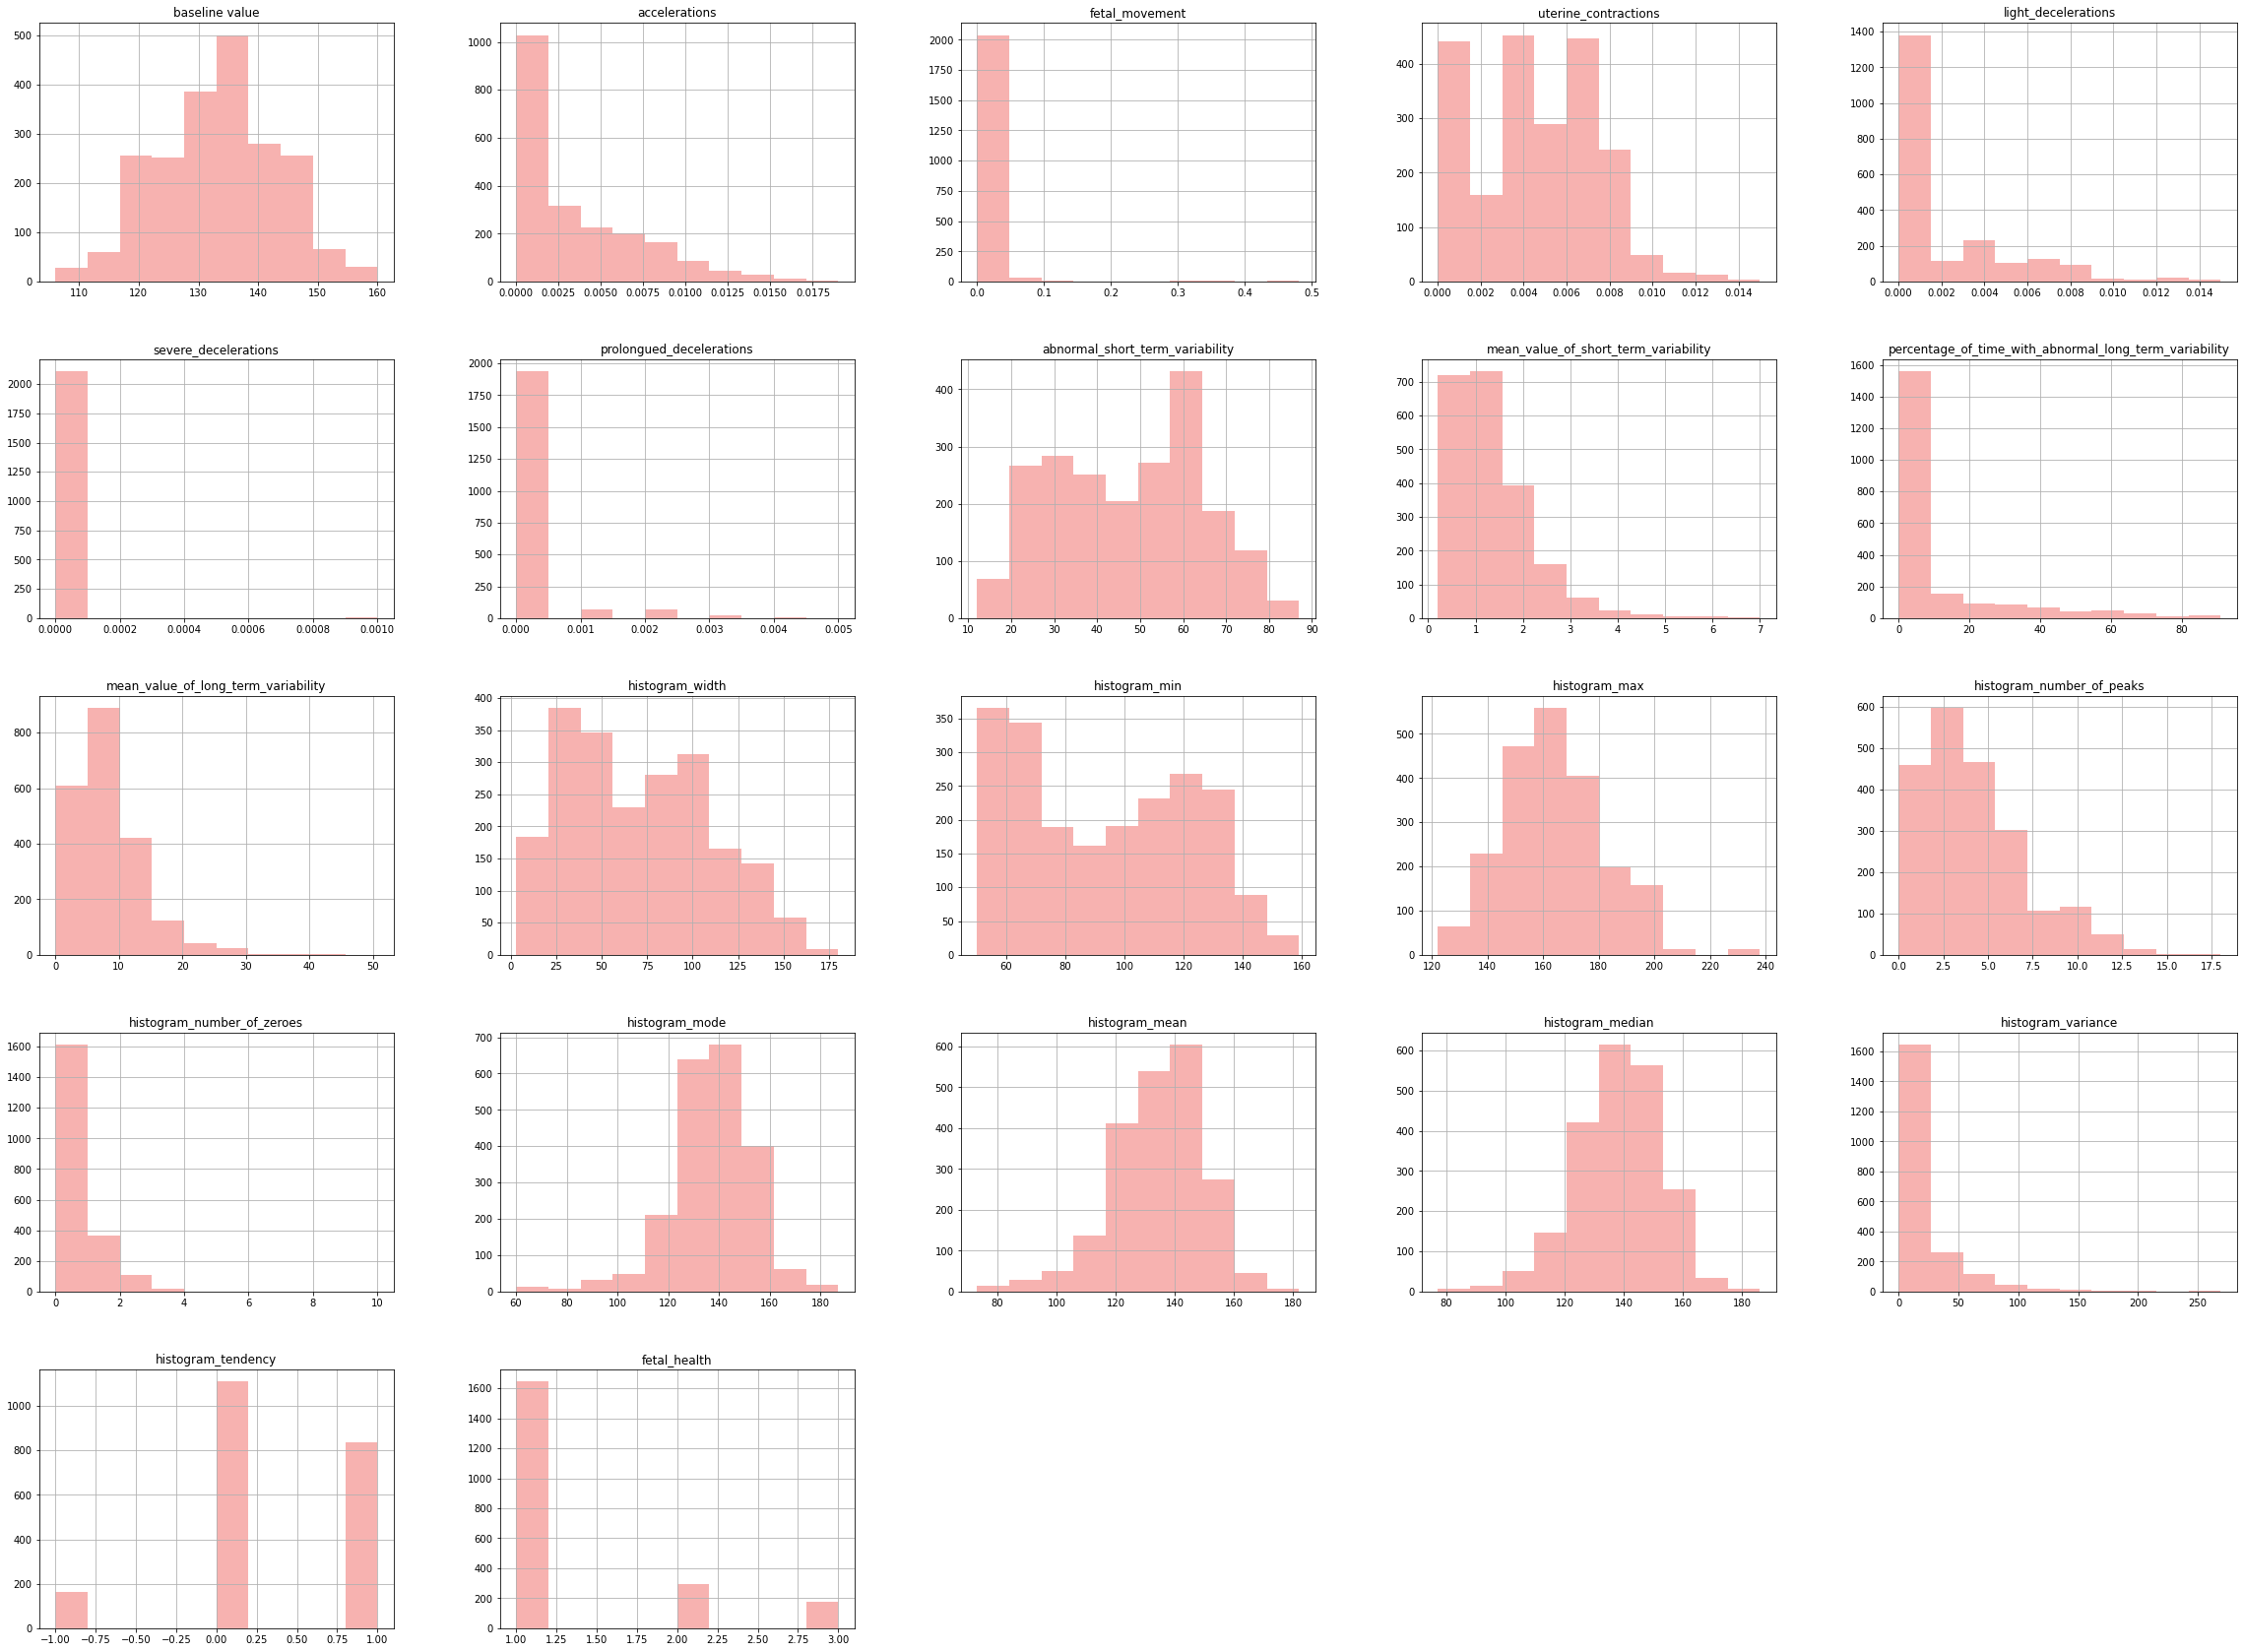

In [284]:
# to see all columns
hist = data.hist(figsize=(40, 30), color ="#f7b2b0")

<AxesSubplot:xlabel='fetal_health', ylabel='count'>

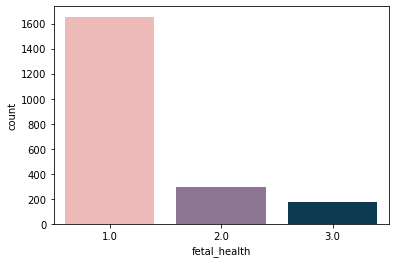

In [7]:
#to se the target "fetal_health"

colours=["#f7b2b0","#8f7198", "#003f5c"]
sns.countplot(data= data, x="fetal_health",palette=colours)

Text(0.5, 1.0, 'Fetal Heath')

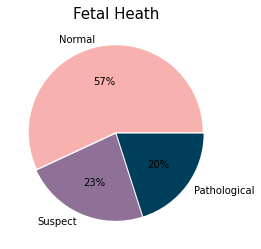

In [172]:
# Pie chart of Fetal Heath
total = data["fetal_health"].sum()
normal = total - 471
suspect = total - 1831
pathological = total - 1950

pie_fetal_health = plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], colors=["#f7b2b0","#8f7198", "#003f5c"],explode=[0.01,0.01,0.01], autopct="%1.0f%%")
plt.title('Fetal Heath', fontsize = 15)

array([0.80307361, 0.19692639])

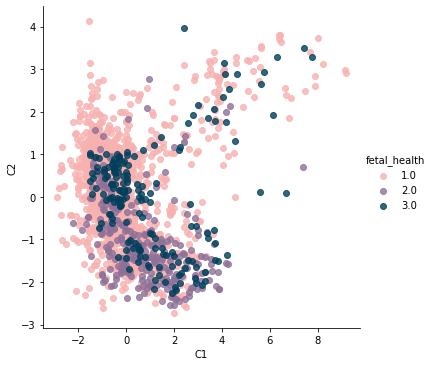

In [182]:
## Checking for LDA variations to see the separability (Linear Discriminant Analysis (LDA))

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)

lda_data_mod = lda.fit_transform(X,y)
lda_data = pd.DataFrame(data=lda_data_mod, columns=['C1', 'C2'])

lda_data = pd.concat([lda_data, y], axis=1)
sns.lmplot(x='C1', y='C2', data=lda_data, hue='fetal_health' , fit_reg=False,palette=colours)
lda.explained_variance_ratio_

In [8]:
# 'fetal_health' Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)

data["fetal_health"].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

#### Data Pre-processing : ( Data Cleaning : duplicate - Null - messing )

In [9]:
# Null
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [10]:
# Messing

Duplicate

In [11]:
sum(data. duplicated())

13

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
sum(data. duplicated())

0

In [33]:
plot_data = data.groupby('fetal_health')['fetal_health'].agg(['count']).reset_index()

<AxesSubplot:>

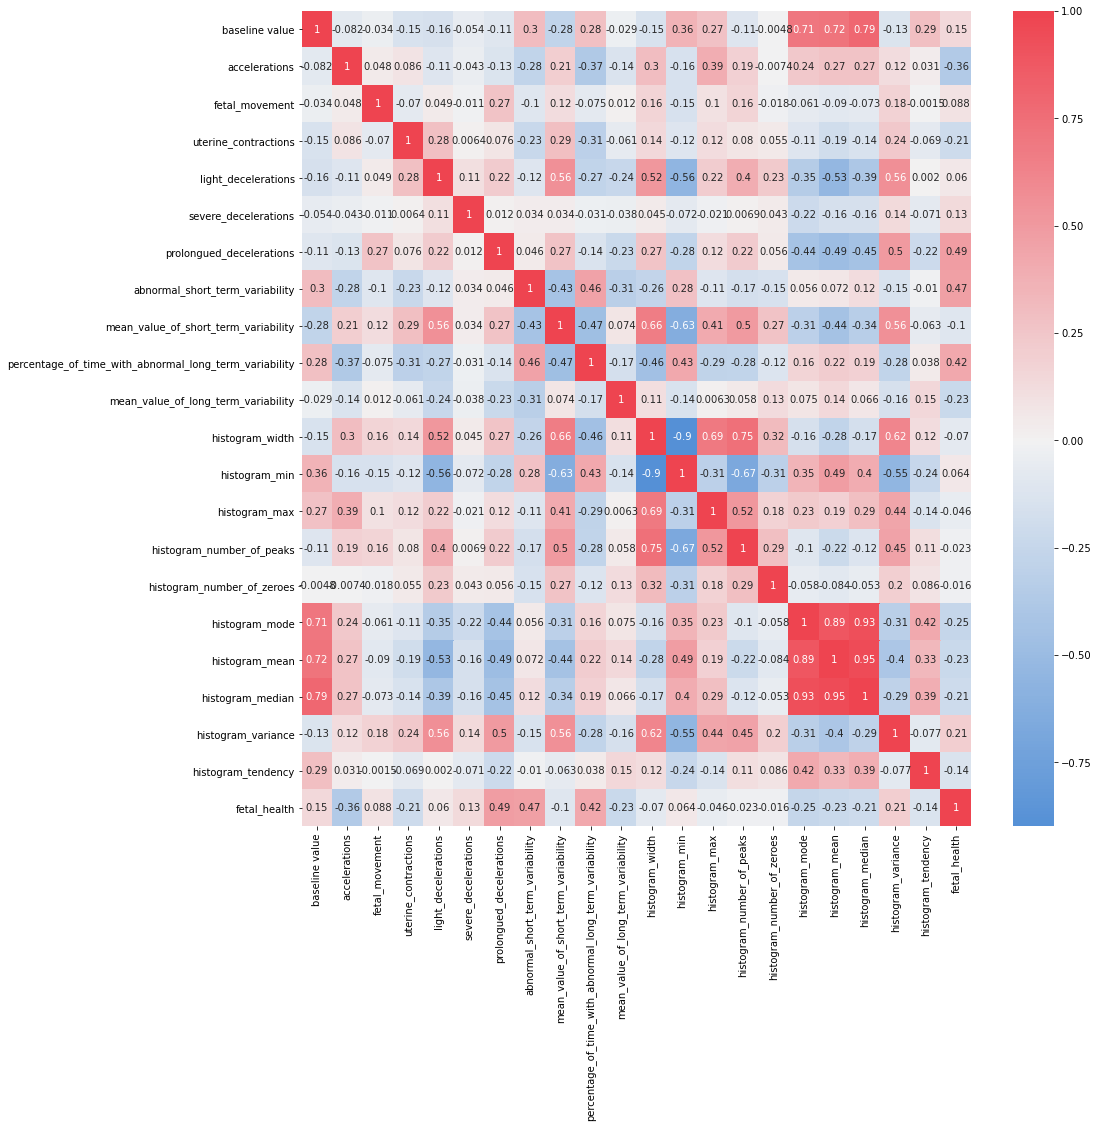

In [185]:
#correlation matrix

corrmat= data.corr()
plt.figure(figsize=(15,15))  

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)


In [32]:
#sns.lmplot(x='fetal_health',y='fetal_movement',size=2,aspect=4,data=data)

The relationship between fetal health and each column

<Figure size 720x504 with 0 Axes>

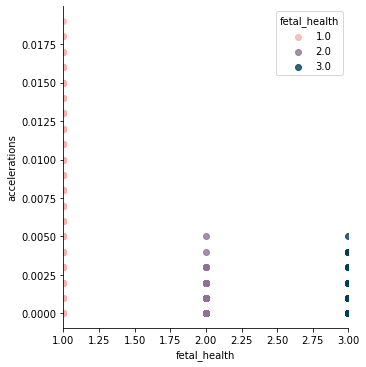

In [261]:
plt.figure(figsize=(10,7))
sns.lmplot(data =data,x="fetal_health",y="accelerations",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

<Figure size 720x504 with 0 Axes>

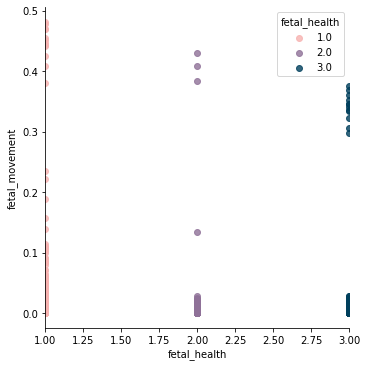

In [263]:
plt.figure(figsize=(10,7))
sns.lmplot(data =data,x="fetal_health",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

<Figure size 720x504 with 0 Axes>

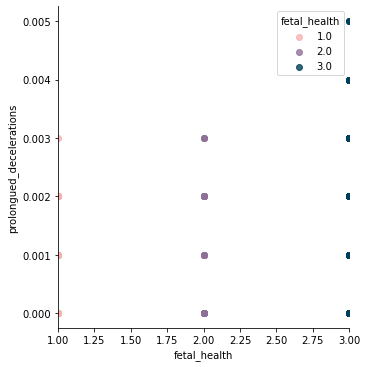

In [264]:
plt.figure(figsize=(10,7))
sns.lmplot(data =data,x="fetal_health",y="prolongued_decelerations",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

In this notebook, we will answer the following questions :¶


Q: What is the relationship between Baseline Fetal Heart Rate and uterine contractions for Pathological fetal?

Q : Can uterine contractions and fetal movement express the fetal heath spacially Pathological type of fetal?

Q : Can Fetal heart rate monitoring of short-term variation (STV) has a relationship with fetal health in terms of baseline value?

Q : What is the relationship between severe decelerations and uterine contractions in each type of fetal health?

Q : Does mean value of short term variability has a relationship with fetal health type in term of uterine contractions?

*************************************************************************************************************************************
*************************************************************************************************************************************
*************************************************************************************************************************************


Q: What is the relationship between Baseline Fetal Heart Rate and uterine contractions for Pathological fetal?

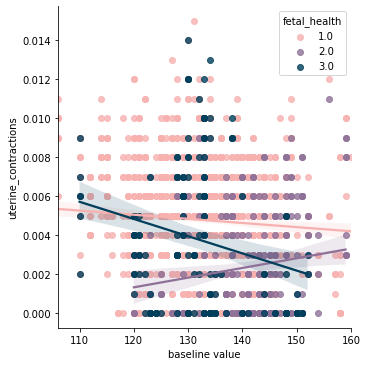

In [270]:
sns.lmplot(data =data,x='baseline value', y='uterine_contractions',palette=colours, hue="fetal_health",legend_out=False)
plt.show()

Q : Can uterine contractions and fetal movement express the fetal heath spacially Pathological type of fetal?

Prolongued Decelerations Vs Fetal Movement by Fetal Health:

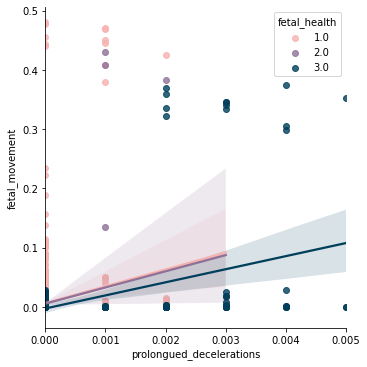

In [271]:
sns.lmplot(data =data,x="prolongued_decelerations",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

Q : Can Fetal heart rate monitoring of short-term variation (STV) has a relationship with fetal health in terms of baseline value?

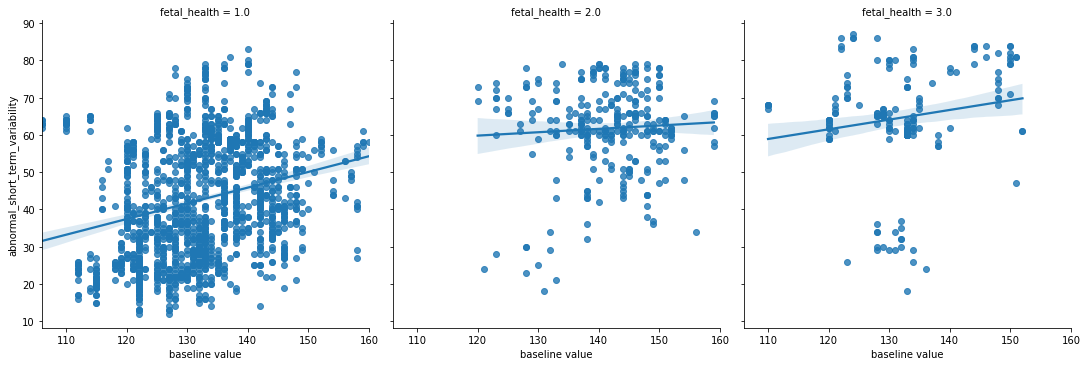

In [279]:
sns.lmplot(x='baseline value',y='abnormal_short_term_variability',data=data,col='fetal_health',palette=colours)

Q : What is the relationship between severe decelerations and uterine contractions in each type of fetal health?

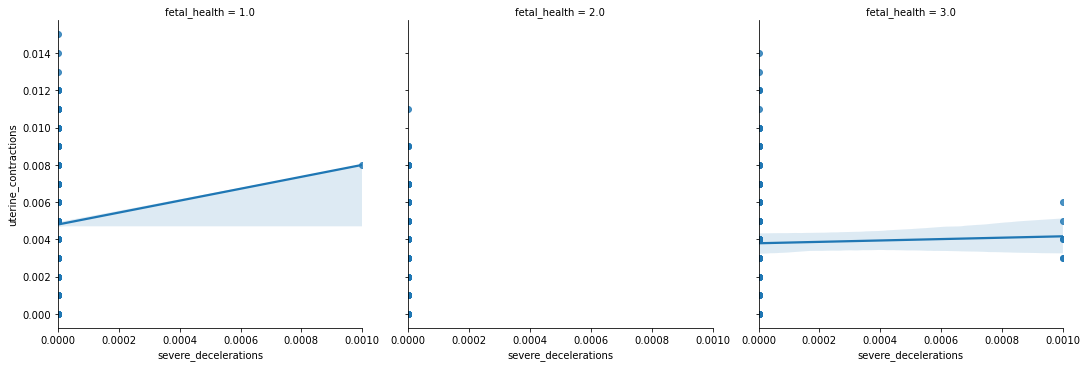

In [281]:
sns.lmplot(x='severe_decelerations',y='uterine_contractions',data=data,col='fetal_health',palette='coolwarm')

Q : Does mean value of short term variability has a relationship with fetal health type in term of uterine contractions?

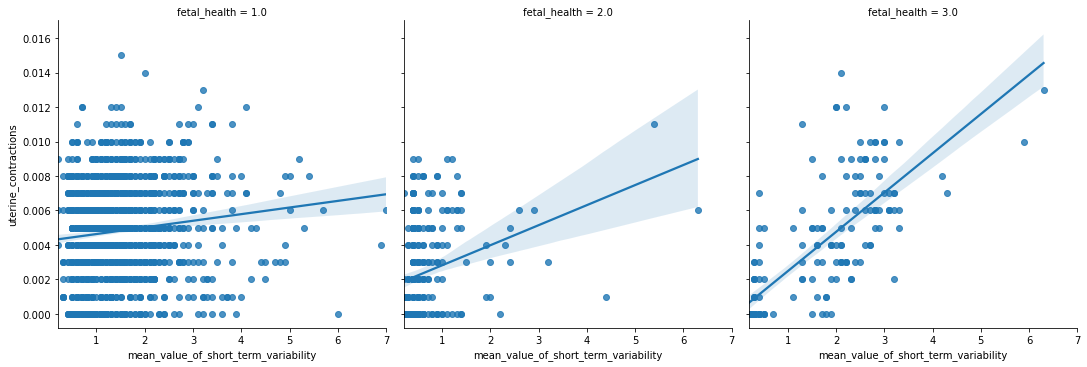

In [282]:
sns.lmplot(x='mean_value_of_short_term_variability',y='uterine_contractions',data=data,col='fetal_health',palette='coolwarm')

Accelerations Vs Fetal Movement by Fetal Health :

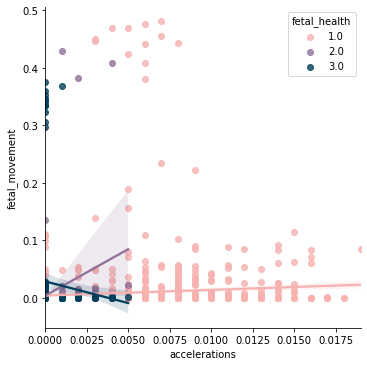

In [188]:
sns.lmplot(data =data,x="accelerations",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

Abnormal Short Term Variability Vs Fetal Movement by Fetal Health:

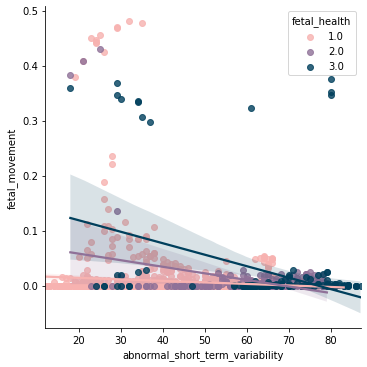

In [40]:
sns.lmplot(data =data,x="abnormal_short_term_variability",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

Mean Value Of Long Term Variability Vs Fetal Movement by Fetal Health:

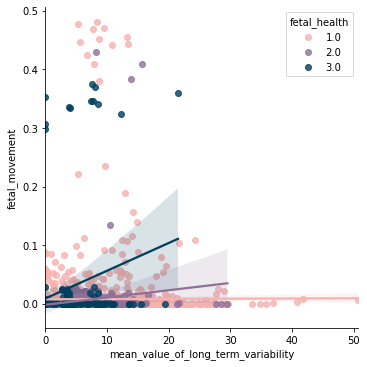

In [41]:
sns.lmplot(data =data,x="mean_value_of_long_term_variability",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

Find outlier and removet:

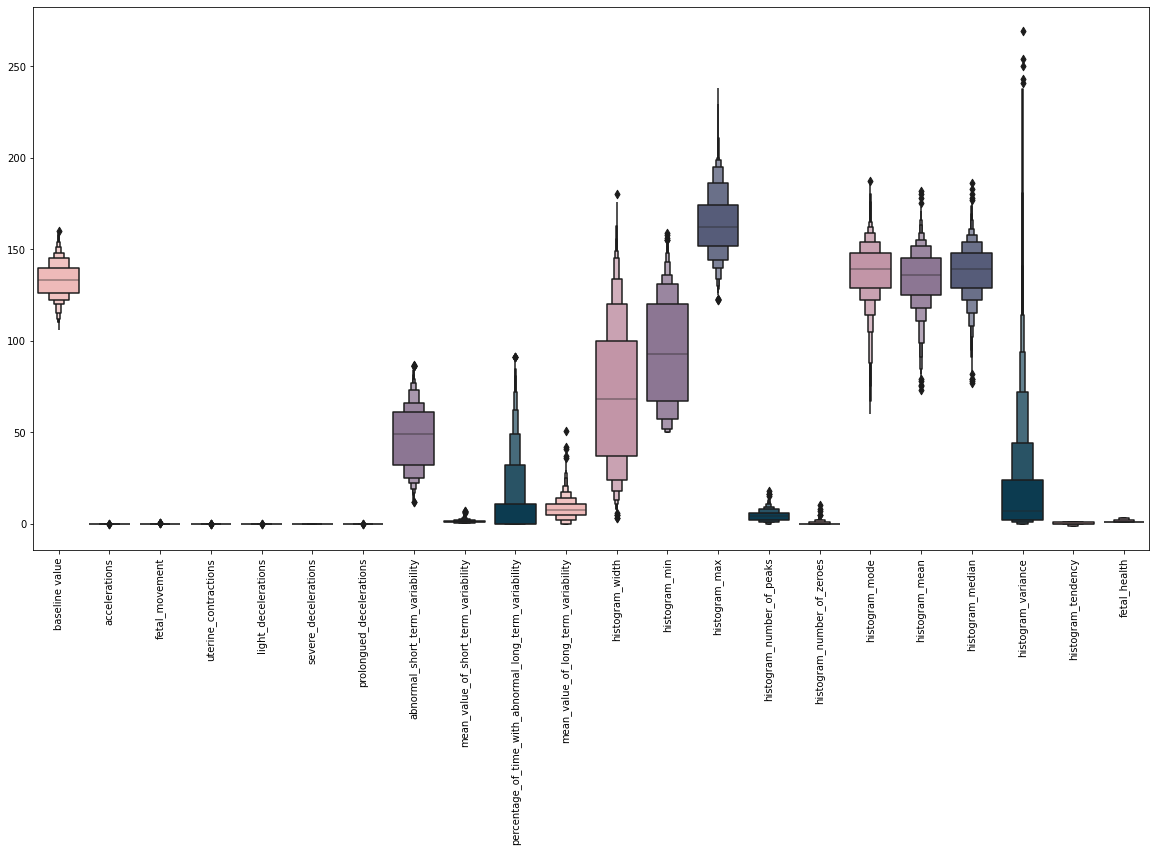

In [42]:
shades =["#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = data,palette = shades)
plt.xticks(rotation=90)
plt.show()

*************************************************************************************************************************************
*************************************************************************************************************************************
*************************************************************************************************************************************


#### feature engineering :

In [179]:
# our data is not need feauter enginnering

*************************************************************************************************************************************
*************************************************************************************************************************************
*************************************************************************************************************************************


MODEL SELECTION AND BUILDING

### Step2 : Start Classification 

In [44]:
# Identify ( features , Target ) 
#X=data.iloc[:,:-1]
#y=data.iloc[:,-1:]

X=data.drop(["fetal_health"],axis=1)
y=data["fetal_health"]

In [45]:
#Set up a standard scaler for the features

col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2113.0,-5.880031e-16,1.000237,-2.776252,-0.742724,-0.030989,0.680746,2.714274
accelerations,2113.0,6.988152e-17,1.000237,-0.823776,-0.823776,-0.307036,0.726444,4.085254
fetal_movement,2113.0,-8.588072e-16,1.000237,-0.203392,-0.203392,-0.203392,-0.139280,10.075993
uterine_contractions,2113.0,-1.634177e-15,1.000237,-1.492245,-0.811961,0.208464,0.888747,3.609880
light_decelerations,2113.0,-6.134337e-15,1.000237,-0.641203,-0.641203,-0.641203,0.370643,4.418027
severe_decelerations,2113.0,-5.337596e-16,1.000237,-0.057653,-0.057653,-0.057653,-0.057653,17.345234
prolongued_decelerations,2113.0,2.528818e-15,1.000237,-0.269640,-0.269640,-0.269640,-0.269640,8.183605
abnormal_short_term_variability,2113.0,6.567812e-17,1.000237,-2.037640,-0.873069,0.116815,0.815557,2.329499
mean_value_of_short_term_variability,2113.0,-3.913365e-16,1.000237,-1.283731,-0.718221,-0.152712,0.412798,6.407199
percentage_of_time_with_abnormal_long_term_variability,2113.0,2.212985e-15,1.000237,-0.534294,-0.534294,-0.534294,0.065725,4.429504


In [285]:
#plt.scatter( x=data['fetal_movement'], y=data['fetal_health'])
#plt.title("Fetal health vs ")

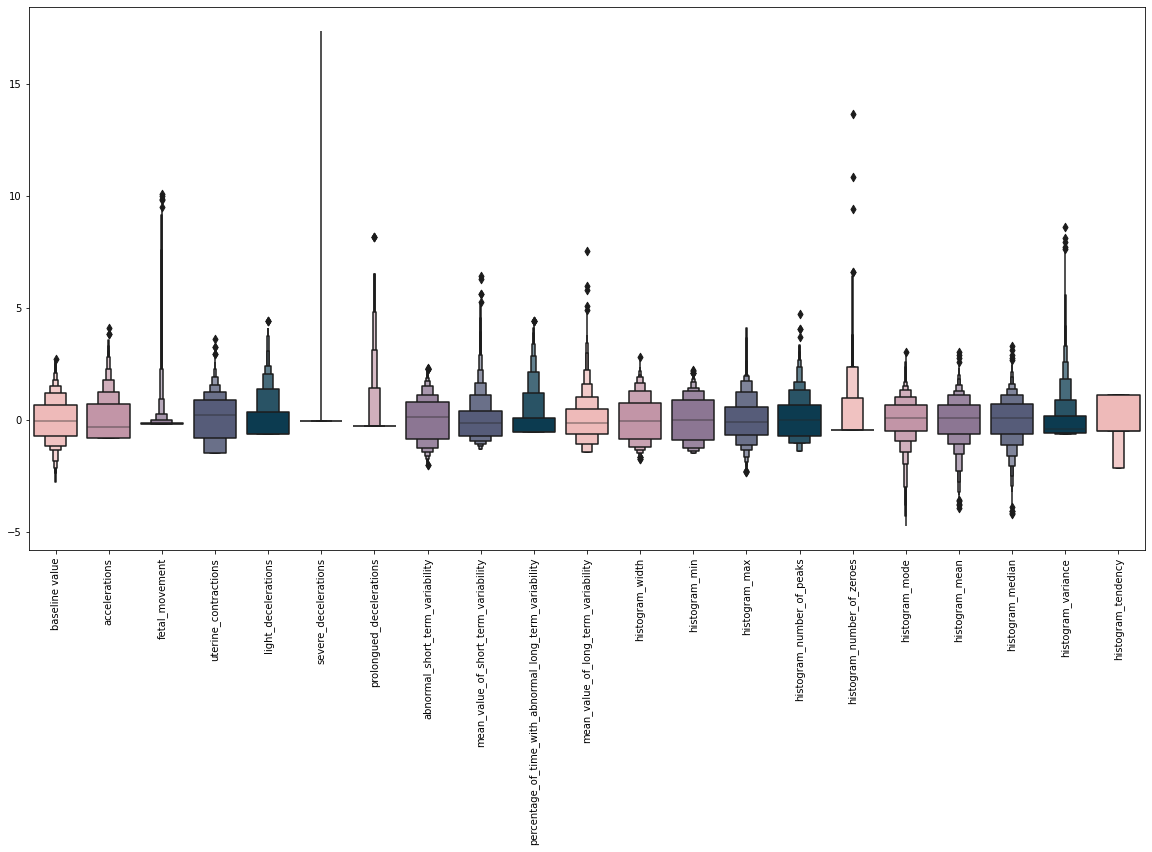

In [51]:
#looking at the scaled features
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df,palette = shades)
plt.xticks(rotation=90)
plt.show()

In [52]:
y

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 2113, dtype: float64

*************************************************************************************************************************************
*************************************************************************************************************************************
*************************************************************************************************************************************


### Start Modeling 

In [53]:
# Steps: 
#1 Split the data to train & test
#2 Feature Scaling هل لازم نسويها عشان مايضرب الكود؟ 
#3 Create the clasefier (Knn + Random forest + ## naive baise)
# 4 fit 
# 5 predict 
#6 evalute model + Visualising the Training set results

In [54]:
# Split the data to train & test .. 80,20

X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.2)

print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (1690, 21)
Shape of X_test: (423, 21)
Shape of y_train: (1690,)
Shape of y_test: (423,)


*************************************************************************************************************************************
*************************************************************************************************************************************
*************************************************************************************************************************************


#### Model 1 : Logistic regression 

In [286]:
#1 TRAIN THE MODEL :
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.multiclass import OneVsRestClassifier
# define model

model_LR = LogisticRegression(solver='liblinear')
ovr1 = OneVsRestClassifier(model_LR)
ovr1.fit(X_train,y_train)

OneVsRestClassifier(estimator=LogisticRegression(solver='liblinear'))

In [287]:
pred_LR = ovr1.predict(X_test)
accuracy = accuracy_score(y_test, pred_LR)
prob = ovr1.predict_proba(X_test)
print("Accuracy obtained by Logistic regression Classifier model:",accuracy)
print("--------------------------------------------------------------------")
print("Probability obtained by Logistic regression Classifier model:",prob)

Accuracy obtained by Logistic regression Classifier model: 0.9243498817966903
--------------------------------------------------------------------
Probability obtained by Logistic regression Classifier model: [[9.56088753e-01 4.35837606e-02 3.27486103e-04]
 [9.98497127e-01 1.34944594e-03 1.53427471e-04]
 [9.67902139e-01 8.03826872e-03 2.40595927e-02]
 ...
 [8.67794439e-01 1.27696977e-01 4.50858427e-03]
 [1.88780251e-01 6.99841319e-01 1.11378430e-01]
 [8.70612008e-01 1.26128635e-01 3.25935706e-03]]


Cross Validation for LR model

In [288]:
scores_LR = cross_val_score(ovr1, X, y, cv=10, scoring='accuracy')
print(scores_LR)

[0.84433962 0.82075472 0.89150943 0.85781991 0.85308057 0.8957346
 0.89099526 0.92417062 0.88625592 0.66350711]


In [289]:
print("Cross Validation for LR model:",scores_LR.mean())

Cross Validation for LR model: 0.8528167754627558


visual sigmoid model 

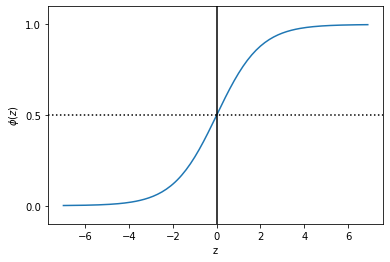

In [290]:
#
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7,7,0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

Evaluation procedure models MAE & MSE & RMSE & R2:

In [291]:
maeLR = metrics.mean_absolute_error(y_test,pred_LR)
mseLR = metrics.mean_squared_error(y_test,pred_LR)
rmseLR = np.sqrt(metrics.mean_squared_error(y_test,pred_LR))
r2LR= metrics.r2_score(y_test,pred_LR)


print('MAE (Mean-Absolute-Error) of Logistic regression : %s' %maeLR)
print('MSE (Mean-Squared-Error) of Logistic regression: %s' %mseLR)
print('RMSE (Root-MSE) of Logistic regression: %s' %rmseLR)
print('R2 score of Logistic regression: %s' %r2LR)

MAE (Mean-Absolute-Error) of Logistic regression : 0.08037825059101655
MSE (Mean-Squared-Error) of Logistic regression: 0.08983451536643026
RMSE (Root-MSE) of Logistic regression: 0.299724065377524
R2 score of Logistic regression: 0.7558626974483598


In [292]:
print(classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

         1.0       0.95      0.98      0.96       333
         2.0       0.75      0.70      0.72        56
         3.0       0.96      0.79      0.87        34

    accuracy                           0.92       423
   macro avg       0.89      0.82      0.85       423
weighted avg       0.92      0.92      0.92       423



In [293]:
from sklearn.metrics import roc_auc_score

print("Compute Area Under the Receiver Operating Characteristic Curve of LR model:",roc_auc_score(y_test, prob, average="weighted", multi_class="ovr"))

Compute Area Under the Receiver Operating Characteristic Curve of LR model: 0.9778490968022316


C:\Users\abo fisel\anaconda\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless



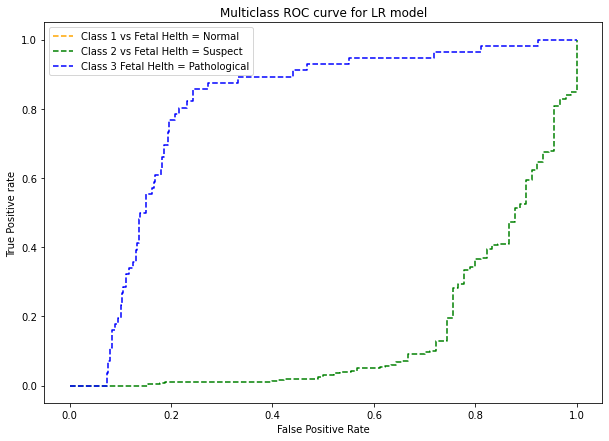

In [294]:
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob[:,i], pos_label=i)
    
# plotting    
plt.figure(figsize=(10,7))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 1 vs Fetal Helth = Normal')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 2 vs Fetal Helth = Suspect')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 3 Fetal Helth = Pathological')
plt.title('Multiclass ROC curve for LR model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='upper left')
plt.savefig('Multiclass ROC',dpi=300);

Evaluation model LR by Confusion matrix, accuracy, recall, precision, false positive rate and F-scores explained :

In [295]:
acccuracyLR = accuracy_score(y_test, pred_LR)
recallLR = recall_score(y_test, pred_LR, average="weighted")
precisionLR = precision_score(y_test, pred_LR, average="weighted")
f1_scoreLR = f1_score(y_test, pred_LR, average="micro")

print("********* Logistic regression Results *********")
print("Recall      : ", recallLR)
print("Precision   : ", precisionLR)
print("F1 Score    : ", f1_scoreLR)

********* Logistic regression Results *********
Recall      :  0.9243498817966903
Precision   :  0.9227198478175465
F1 Score    :  0.9243498817966903


Cofusion Matrix plt for LR model:

<AxesSubplot:>

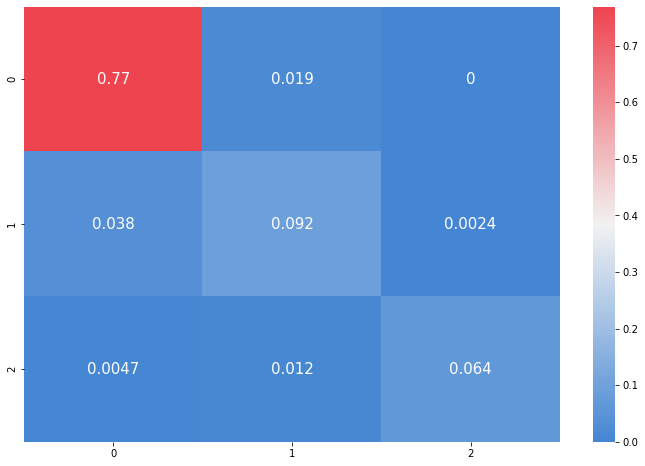

In [296]:
# cofusion matrix
plt.subplots(figsize=(12,8))
cf_matrixlr = confusion_matrix(y_test, pred_LR)
sns.heatmap(cf_matrixlr/np.sum(cf_matrixlr), cmap=cmap,annot = True, annot_kws = {'size':15})

In [297]:
confusion_LR = metrics.confusion_matrix(y_test,pred_LR)
print(confusion_LR)
#[row, column]
TP_LR = confusion_LR[1, 1]
TN_LR = confusion_LR[0, 0]
FP_LR = confusion_LR[0, 1]
FN_LR = confusion_LR[1, 0]

[[325   8   0]
 [ 16  39   1]
 [  2   5  27]]


In [298]:
classification_error_LR = (FP_LR + FN_LR) / float(TP_LR + TN_LR + FP_LR + FN_LR)

print(classification_error_LR)
print(1 - metrics.accuracy_score(y_test, pred_LR))

0.061855670103092786
0.07565011820330969


In [299]:
sensitivity_LR = TP_LR / float(FN_LR + TP_LR)

print(sensitivity_LR)

0.7090909090909091


In [300]:
specificity_LR = TN_LR / (TN_LR + FP_LR)

print(specificity_LR)

0.975975975975976


In [301]:
false_positive_rate_LR = FP_LR / float(TN_LR + FP_LR)

print(false_positive_rate_LR)
print(1 - specificity_LR)

0.024024024024024024
0.024024024024024038


In [302]:
# Visualising the Training set results

*************************************************************************************************************************************
*************************************************************************************************************************************
*************************************************************************************************************************************


#### Model 2 : Random forest 

In [303]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier()
ovr2 = OneVsRestClassifier(model_RF)
ovr2.fit(X_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier())

In [304]:
pred_RF = ovr2.predict(X_test)
accuracy1 = accuracy_score(y_test, pred_RF)
prob1 = ovr2.predict_proba(X_test)
print("Accuracy obtained by Random Forest Classifier model:",accuracy1)
print("--------------------------------------------------------------------")
print("Probability obtained by Random Forest Classifier model:",prob1)

Accuracy obtained by Random Forest Classifier model: 0.9527186761229315
--------------------------------------------------------------------
Probability obtained by Random Forest Classifier model: [[1.         0.         0.        ]
 [0.98       0.02       0.        ]
 [1.         0.         0.        ]
 ...
 [0.94174757 0.04854369 0.00970874]
 [0.27160494 0.69135802 0.03703704]
 [0.99009901 0.00990099 0.        ]]


Cross Validation for RF model

In [305]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
scores_RF = cross_val_score(ovr2, X, y, cv=10, scoring='accuracy')
print(scores_RF)

[0.88679245 0.91037736 0.91037736 0.89099526 0.8957346  0.95260664
 0.84834123 0.91469194 0.84834123 0.7014218 ]


In [306]:
print("Cross Validation for RF model:",scores_RF.mean())

Cross Validation for RF model: 0.8759679871233124


In [307]:
from sklearn.metrics import roc_auc_score

print("Compute Area Under the Receiver Operating Characteristic Curve of RF model:",roc_auc_score(y_test, prob1, average="weighted", multi_class="ovr"))

Compute Area Under the Receiver Operating Characteristic Curve of RF model: 0.9835200458173647


C:\Users\abo fisel\anaconda\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless



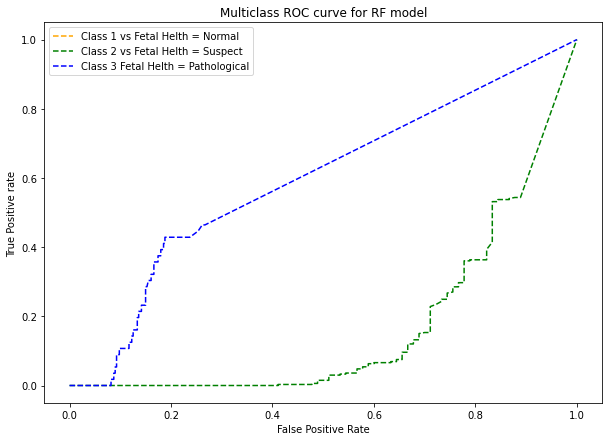

In [308]:
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob1[:,i], pos_label=i)
    
# plotting  
plt.figure(figsize=(10,7))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 1 vs Fetal Helth = Normal')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 2 vs Fetal Helth = Suspect')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 3 Fetal Helth = Pathological')
plt.title('Multiclass ROC curve for RF model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

Evaluation procedure models MAE & MSE & RMSE & R2:

In [309]:
maeRF = metrics.mean_absolute_error(y_test,pred_RF)
mseRF = metrics.mean_squared_error(y_test,pred_RF)
rmseRF = np.sqrt(metrics.mean_squared_error(y_test,pred_RF))
r2RF= metrics.r2_score(y_test,pred_RF)


print('MAE (Mean-Absolute-Error) of Random Forest: %s' %maeRF)
print('MSE (Mean-Squared-Error) of Random Forest: %s' %mseRF)
print('RMSE (Root-MSE) of Random Forest: %s' %rmseRF)
print('R2 score of Random Forest: %s' %r2RF)

MAE (Mean-Absolute-Error) of Random Forest: 0.05200945626477541
MSE (Mean-Squared-Error) of Random Forest: 0.061465721040189124
RMSE (Root-MSE) of Random Forest: 0.24792281266593666
R2 score of Random Forest: 0.832958687727825


In [310]:
print(classification_report(y_test, pred_RF))

              precision    recall  f1-score   support

         1.0       0.97      0.98      0.97       333
         2.0       0.87      0.80      0.83        56
         3.0       0.94      0.94      0.94        34

    accuracy                           0.95       423
   macro avg       0.92      0.91      0.92       423
weighted avg       0.95      0.95      0.95       423



Evaluation model RF by Confusion matrix, accuracy, recall, precision, false positive rate and F-scores explained :

In [311]:
recallRF = recall_score(y_test, pred_RF, average="weighted")
precisionRF = precision_score(y_test, pred_RF, average="weighted")
f1_scoreRF = f1_score(y_test, pred_RF, average="micro")

print("********* Random Forest Results *********")
print("Recall      : ", recallRF)
print("Precision   : ", precisionRF)
print("F1 Score    : ", f1_scoreRF)

********* Random Forest Results *********
Recall      :  0.9527186761229315
Precision   :  0.9517543788646762
F1 Score    :  0.9527186761229315


Cofusion Matrix plt for RF model:

<AxesSubplot:>

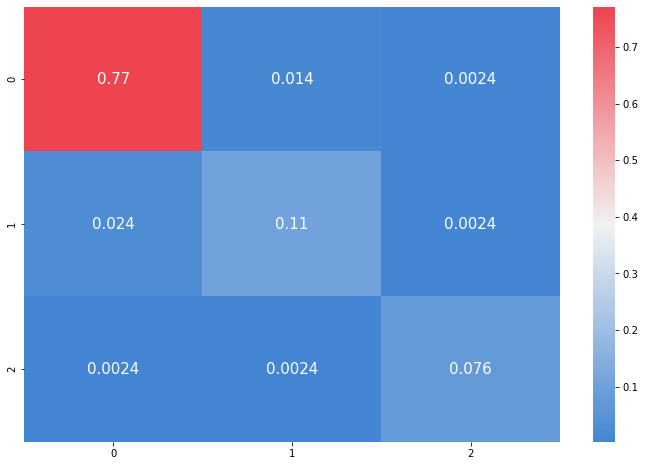

In [312]:
# cofusion matrix
plt.subplots(figsize=(12,8))
cf_matrixrf = confusion_matrix(y_test, pred_RF)
sns.heatmap(cf_matrixrf/np.sum(cf_matrixrf), cmap=cmap,annot = True, annot_kws = {'size':15})

In [313]:
confusion_RF = metrics.confusion_matrix(y_test,pred_RF)
print(confusion_RF)
#[row, column]
TP_RF = confusion_RF[1, 1]
TN_RF = confusion_RF[0, 0]
FP_RF = confusion_RF[0, 1]
FN_RF = confusion_RF[1, 0]

[[326   6   1]
 [ 10  45   1]
 [  1   1  32]]


In [314]:
classification_error_RF = (FP_RF + FN_RF) / float(TP_RF + TN_RF + FP_RF + FN_RF)

print(classification_error_RF)
print(1 - metrics.accuracy_score(y_test,pred_RF))

0.041343669250646
0.047281323877068515


In [315]:
sensitivity_RF = TP_RF / float(FN_RF + TP_RF)
print(sensitivity_RF)


0.8181818181818182


In [316]:
specificity_RF = TN_RF / (TN_RF + FP_RF)

print(specificity_RF)

0.9819277108433735


In [317]:
false_positive_rate_RF = FP_RF / float(TN_RF + FP_RF)

print(false_positive_rate_RF)
print(1 - specificity_RF)

0.018072289156626505
0.01807228915662651


In [318]:
# Visualising the Training set results

*************************************************************************************************************************************
*************************************************************************************************************************************
*************************************************************************************************************************************


#### Model 3 : KNN

Find Better Score for model from K =1 to K=26 :

In [319]:
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.9101654846335697, 0.9078014184397163, 0.9125295508274232, 0.9243498817966903, 0.9267139479905437, 0.91725768321513, 0.9101654846335697, 0.9078014184397163, 0.9078014184397163, 0.9101654846335697, 0.9148936170212766, 0.9101654846335697, 0.9125295508274232, 0.9054373522458629, 0.9078014184397163, 0.9054373522458629, 0.9030732860520094, 0.8959810874704491, 0.9054373522458629, 0.8959810874704491, 0.900709219858156, 0.900709219858156, 0.9054373522458629, 0.900709219858156, 0.9054373522458629]


Text(0, 0.5, 'Testing Accuracy')

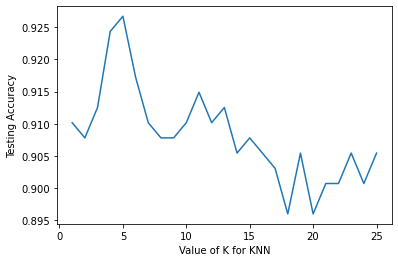

In [320]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

KNN when neighbors =5 :

In [321]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN1 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
ovr3=OneVsRestClassifier(model_KNN1)
ovr3.fit(X_train,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [322]:
pred_KNN1 = ovr3.predict(X_test)
accuracy2 = accuracy_score(y_test, pred_KNN1)
prob2 = ovr3.predict_proba(X_test)
print("Accuracy obtained by KNN Classifier model:",accuracy2)
print("--------------------------------------------------------------------")
print("Probability obtained by KNN Classifier model:",prob2)

Accuracy obtained by KNN Classifier model: 0.9290780141843972
--------------------------------------------------------------------
Probability obtained by KNN Classifier model: [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


Cross Validation for knn model:

In [323]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
scores = cross_val_score(model_KNN1, X, y, cv=10, scoring='accuracy')
print(scores)

[0.84433962 0.8254717  0.88207547 0.8056872  0.88625592 0.90995261
 0.81990521 0.8436019  0.86255924 0.66824645]


In [324]:
print("Cross Validation for KNN model:",scores.mean())

Cross Validation for KNN model: 0.8348095323258518


In [325]:
from sklearn.metrics import roc_auc_score

print("Compute Area Under the Receiver Operating Characteristic Curve of KNN model:",roc_auc_score(y_test, prob2, average="weighted", multi_class="ovr"))

Compute Area Under the Receiver Operating Characteristic Curve of KNN model: 0.9488097584203973


C:\Users\abo fisel\anaconda\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless



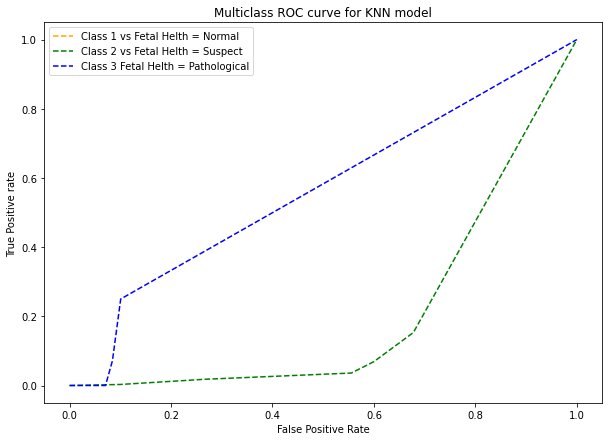

In [326]:
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob2[:,i], pos_label=i)
    
# plotting    
plt.figure(figsize=(10,7))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 1 vs Fetal Helth = Normal')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 2 vs Fetal Helth = Suspect')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 3 Fetal Helth = Pathological')
plt.title('Multiclass ROC curve for KNN model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

KNN when neighbors =7:

In [327]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN7 = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=2)
ovr4 =OneVsRestClassifier(model_KNN7)
ovr4.fit(X_train,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier(n_neighbors=7))

In [328]:
pred_KNN7 = ovr4.predict(X_test)
accuracy7 = accuracy_score(y_test, pred_KNN7)
prob7 = ovr4.predict_proba(X_test)
print("Accuracy obtained by KNN Classifier model:",accuracy7)
print("--------------------------------------------------------------------")
print("Probability obtained by KNN Classifier model:",prob7)

Accuracy obtained by KNN Classifier model: 0.9101654846335697
--------------------------------------------------------------------
Probability obtained by KNN Classifier model: [[1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 ...
 [1.         0.         0.        ]
 [0.85714286 0.14285714 0.        ]
 [1.         0.         0.        ]]


KNN when neighbors =17 :

In [329]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN17 = KNeighborsClassifier(n_neighbors=17, metric='minkowski', p=2)
ovr5 =OneVsRestClassifier(model_KNN17)
ovr5.fit(X_train,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier(n_neighbors=17))

In [330]:
pred_KNN17 = ovr5.predict(X_test)
accuracy17 = accuracy_score(y_test, pred_KNN17)
prob17 = ovr5.predict_proba(X_test)
print("Accuracy obtained by KNN Classifier model:",accuracy17)
print("--------------------------------------------------------------------")
print("Probability obtained by KNN Classifier model:",prob17)

Accuracy obtained by KNN Classifier model: 0.9030732860520094
--------------------------------------------------------------------
Probability obtained by KNN Classifier model: [[1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 ...
 [0.94117647 0.05882353 0.        ]
 [0.58823529 0.41176471 0.        ]
 [1.         0.         0.        ]]


Evaluation procedure models MAE & MSE & RMSE & R2:

In [331]:
maeknn = metrics.mean_absolute_error(y_test, pred_KNN1)
mseknn = metrics.mean_squared_error(y_test,pred_KNN1)
rmseknn = np.sqrt(metrics.mean_squared_error(y_test,pred_KNN1))
r2knn= metrics.r2_score(y_test,pred_KNN1)


print('MAE (Mean-Absolute-Error) of KNN: %s' %maeknn)
print('MSE (Mean-Squared-Error) of KNN: %s' %mseknn)
print('RMSE (Root-MSE)  of KNN: %s' %rmseknn)
print('R2 score  of KNN: %s' %r2knn)

MAE (Mean-Absolute-Error) of KNN: 0.07565011820330969
MSE (Mean-Squared-Error) of KNN: 0.0851063829787234
RMSE (Root-MSE)  of KNN: 0.2917299829957891
R2 score  of KNN: 0.7687120291616039


In [332]:
print(classification_report(y_test, pred_KNN1))

              precision    recall  f1-score   support

         1.0       0.96      0.96      0.96       333
         2.0       0.73      0.80      0.76        56
         3.0       1.00      0.79      0.89        34

    accuracy                           0.93       423
   macro avg       0.90      0.85      0.87       423
weighted avg       0.93      0.93      0.93       423



Evaluation model KNN by Confusion matrix, accuracy, recall, precision, false positive rate and F-scores explained :

In [333]:
recallKNN = recall_score(y_test, pred_KNN1, average="weighted")
precisionKNN = precision_score(y_test, pred_KNN1, average="weighted")
f1_scoreKNN = f1_score(y_test, pred_KNN1, average="micro")

print("********* KNN   Results *********")
print("Recall      : ", recallKNN)
print("Precision   : ", precisionKNN)
print("F1 Score    : ", f1_scoreKNN)

********* KNN   Results *********
Recall      :  0.9290780141843972
Precision   :  0.9330592989267404
F1 Score    :  0.9290780141843973


Cofusion Matrix plt for KNN model:

<AxesSubplot:>

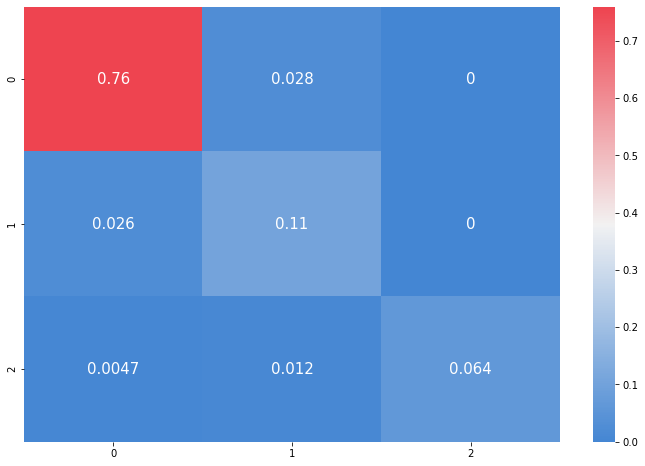

In [334]:
# cofusion matrix
plt.subplots(figsize=(12,8))
cf_matrixknn = confusion_matrix(y_test, pred_KNN1)
sns.heatmap(cf_matrixknn/np.sum(cf_matrixknn), cmap=cmap,annot = True, annot_kws = {'size':15})

In [335]:
confusion_knn = metrics.confusion_matrix(y_test,pred_KNN1)
print(confusion_knn)
#[row, column]
TP_knn = confusion_knn[1, 1]
TN_knn = confusion_knn[0, 0]
FP_knn = confusion_knn[0, 1]
FN_knn = confusion_knn[1, 0]

[[321  12   0]
 [ 11  45   0]
 [  2   5  27]]


In [336]:
classification_error_knn = (FP_knn + FN_knn) / float(TP_knn + TN_knn + FP_knn + FN_knn)

print(classification_error_knn)
print(1 - metrics.accuracy_score(y_test,pred_KNN1))

0.05912596401028278
0.07092198581560283


In [337]:
sensitivity_knn = TP_knn / float(FN_knn + TP_knn)

print(sensitivity_knn)

0.8035714285714286


In [338]:
specificity_knn = TN_knn / (TN_knn + FP_knn)

print(specificity_knn)

0.963963963963964


In [339]:
false_positive_rate_knn = FP_knn / float(TN_knn + FP_knn)

print(false_positive_rate_knn)
print(1 - specificity_knn)

0.036036036036036036
0.036036036036036


*************************************************************************************************************************************
*************************************************************************************************************************************
*************************************************************************************************************************************


### conclusion 

The end..
after evaluate all model we concluded the Random Forest Model is best acuracy 

*************************************************************************************************************************************
*************************************************************************************************************************************
*************************************************************************************************************************************


----------------------------------------------------End-----------------------------------------------------------------------

*************************************************************************************************************************************
*************************************************************************************************************************************
*************************************************************************************************************************************
